<a href="https://colab.research.google.com/github/PDmitrii/sql_tasks_sber_d_a/blob/main/Sber_DA_hw5_lesson_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

task1  (lesson7)
sqlite3: Сделать тестовый проект с БД (sqlite3, project name: task1_7). В таблицу table1 записать 1000 строк с случайными значениями (3 колонки, тип int) от 0 до 1000.
-- Далее построить гистаграмму распределения этих трех колонкок

In [24]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [1]:
import sqlite3
conn_sqlite=sqlite3.connect('task1_7')
c=conn_sqlite.cursor()

In [6]:
request="Create table random_int_3f(f1 int, f2 int, f3 int)"
c.execute(request)
tables=c.fetchall()

In [16]:
df_0=pd.DataFrame({'f1':np.random.randint(0,1000,1000),'f2':np.random.randint(0,1000,1000),'f3':np.random.randint(0,1000,1000)})
df_0.set_index('f1',inplace=True)

In [17]:
df_0.head(5)

,f2,f3
f1,,
554,847,360
591,558,800
505,498,56
980,955,270
837,345,331


In [18]:
df_0.to_sql(name='random_int_3f',con=conn_sqlite,if_exists='append')

In [21]:
query_="select * from random_int_3f"
df_1=pd.read_sql(query_,con=conn_sqlite)

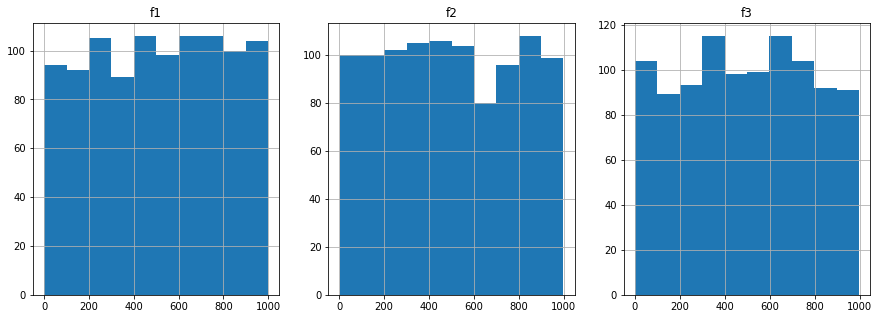

In [33]:
plt.figure(figsize=(15,5))
for i,col in enumerate(df_1.columns):
  plt.subplot(1,3,i+1)
  plt.title(col)
  df_1[col].hist(bins=10)